In [2]:
import yfinance as yf

# Define the stock and time period
ticker = "msft"
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch the historical data
stock_data = yf.download(ticker, start=start_date, end=end_date)

/var/folders/l3/6x2gqh2x1rbdkr21_hzckff40000gn/T/ipykernel_73203/2583869208.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [3]:
print(stock_data)

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2020-01-02  153.042282  153.147093  150.860326  151.289093  22622100
2020-01-03  151.136627  152.403882  150.603049  150.850792  21116200
2020-01-06  151.527328  151.594033  149.126212  149.669328  20813700
2020-01-07  150.145721  152.137116  149.897993  151.803637  21634100
2020-01-08  152.537323  153.213833  150.498284  151.432046  27746500
...                ...         ...         ...         ...       ...
2023-12-22  370.375732  370.969004  368.526726  369.485840  17091100
2023-12-26  370.454834  372.709242  369.307850  370.791014  12673100
2023-12-27  369.871490  370.850369  368.625623  369.495751  14905400
2023-12-28  371.067902  372.234650  369.960477  371.156888  14327000
2023-12-29  371.819366  372.926791  369.288102  371.779807  18723000

[1006 rows x 5 columns]


In [21]:
# Export stock_data to CSV
stock_data.to_csv(f'{ticker}_stock_data.csv', index=True)
print(f"Stock data exported to {ticker}_stock_data.csv")


Stock data exported to msft_stock_data.csv


In [4]:
# Fill missing values with the previous value
stock_data.fillna(method='ffill', inplace=True)

/var/folders/l3/6x2gqh2x1rbdkr21_hzckff40000gn/T/ipykernel_73203/2671764243.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


In [5]:
# Create a 20 day moving average
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a clean DataFrame with aligned data
# First, create a DataFrame with both MA20 and Close, then drop any rows with NaN values
clean_data = stock_data[['MA20', 'Close']].dropna()

# Define the feature set and the target variable
X = clean_data['MA20'].values.reshape(-1, 1)  # Features reshaped to 2D array
y = clean_data['Close'].values  # Target (1D array)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [8]:
# Get the coefficients from the trained model
slope = float(model.coef_[0])
intercept = float(model.intercept_)

# Print the linear regression equation
print(f"Linear Regression Equation:")
print(f"Predicted Stock Price = {slope:.4f} × MA20 + {intercept:.4f}")
print(f"\nOr in mathematical notation:")
print(f"y = {slope:.4f}x + {intercept:.4f}")
print(f"where y = Predicted Stock Price and x = 20-day Moving Average")


Linear Regression Equation:
Predicted Stock Price = 0.9997 × MA20 + 2.0176

Or in mathematical notation:
y = 0.9997x + 2.0176
where y = Predicted Stock Price and x = 20-day Moving Average


/var/folders/l3/6x2gqh2x1rbdkr21_hzckff40000gn/T/ipykernel_73203/1763375486.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(model.coef_[0])
/var/folders/l3/6x2gqh2x1rbdkr21_hzckff40000gn/T/ipykernel_73203/1763375486.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = float(model.intercept_)


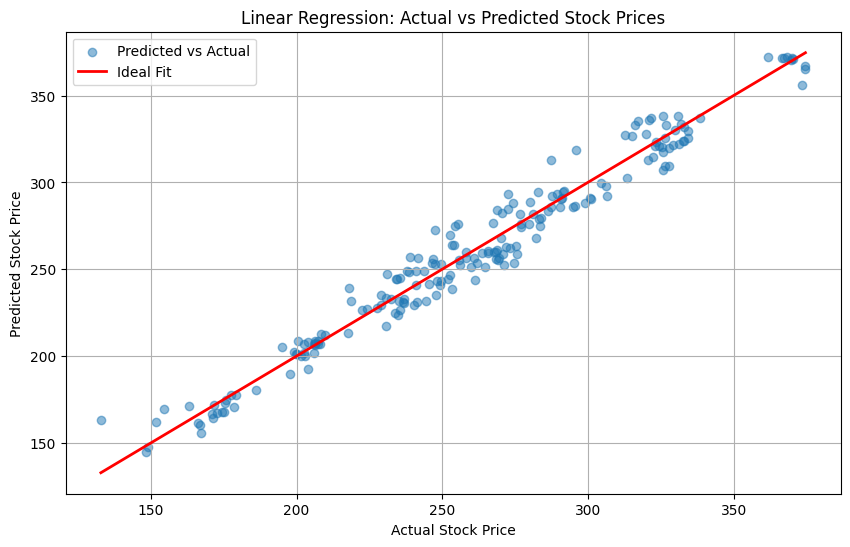

In [9]:
import matplotlib.pyplot as plt


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Linear Regression: Actual vs Predicted Stock Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()

In [10]:

# 1. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Results:")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")


Random Forest Results:
MAE: 9.6106
MSE: 166.3494
RMSE: 12.8976


/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [11]:
# 2. Support Vector Regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

# Calculate metrics for SVR
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)

print("\nSupport Vector Regression Results:")
print(f"MAE: {svr_mae:.4f}")
print(f"MSE: {svr_mse:.4f}")
print(f"RMSE: {svr_rmse:.4f}")



Support Vector Regression Results:
MAE: 12.0549
MSE: 348.9780
RMSE: 18.6810


/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# 3. Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

# Calculate metrics for Polynomial Regression
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)

print("\nPolynomial Regression Results:")
print(f"MAE: {poly_mae:.4f}")
print(f"MSE: {poly_mse:.4f}")
print(f"RMSE: {poly_rmse:.4f}")



Polynomial Regression Results:
MAE: 7.9675
MSE: 98.8673
RMSE: 9.9432


In [13]:
# 4. Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Calculate metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)

print("\nGradient Boosting Results:")
print(f"MAE: {gb_mae:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"RMSE: {gb_rmse:.4f}")


Gradient Boosting Results:
MAE: 8.0428
MSE: 109.0116
RMSE: 10.4409


/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



MODEL COMPARISON
Linear Regression    | MAE: 7.8862 | MSE: 96.9206 | RMSE: 9.8448
Random Forest        | MAE: 9.6106 | MSE: 166.3494 | RMSE: 12.8976
SVR                  | MAE: 12.0549 | MSE: 348.9780 | RMSE: 18.6810
Polynomial           | MAE: 7.9675 | MSE: 98.8673 | RMSE: 9.9432
Gradient Boosting    | MAE: 8.0428 | MSE: 109.0116 | RMSE: 10.4409

Feature Importance (Random Forest):
MA20: 1.0000

Cross-validation scores (5-fold):
Linear          | CV RMSE: 10.2479


/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector 

Random Forest   | CV RMSE: 12.4322
Gradient Boosting | CV RMSE: 10.6410


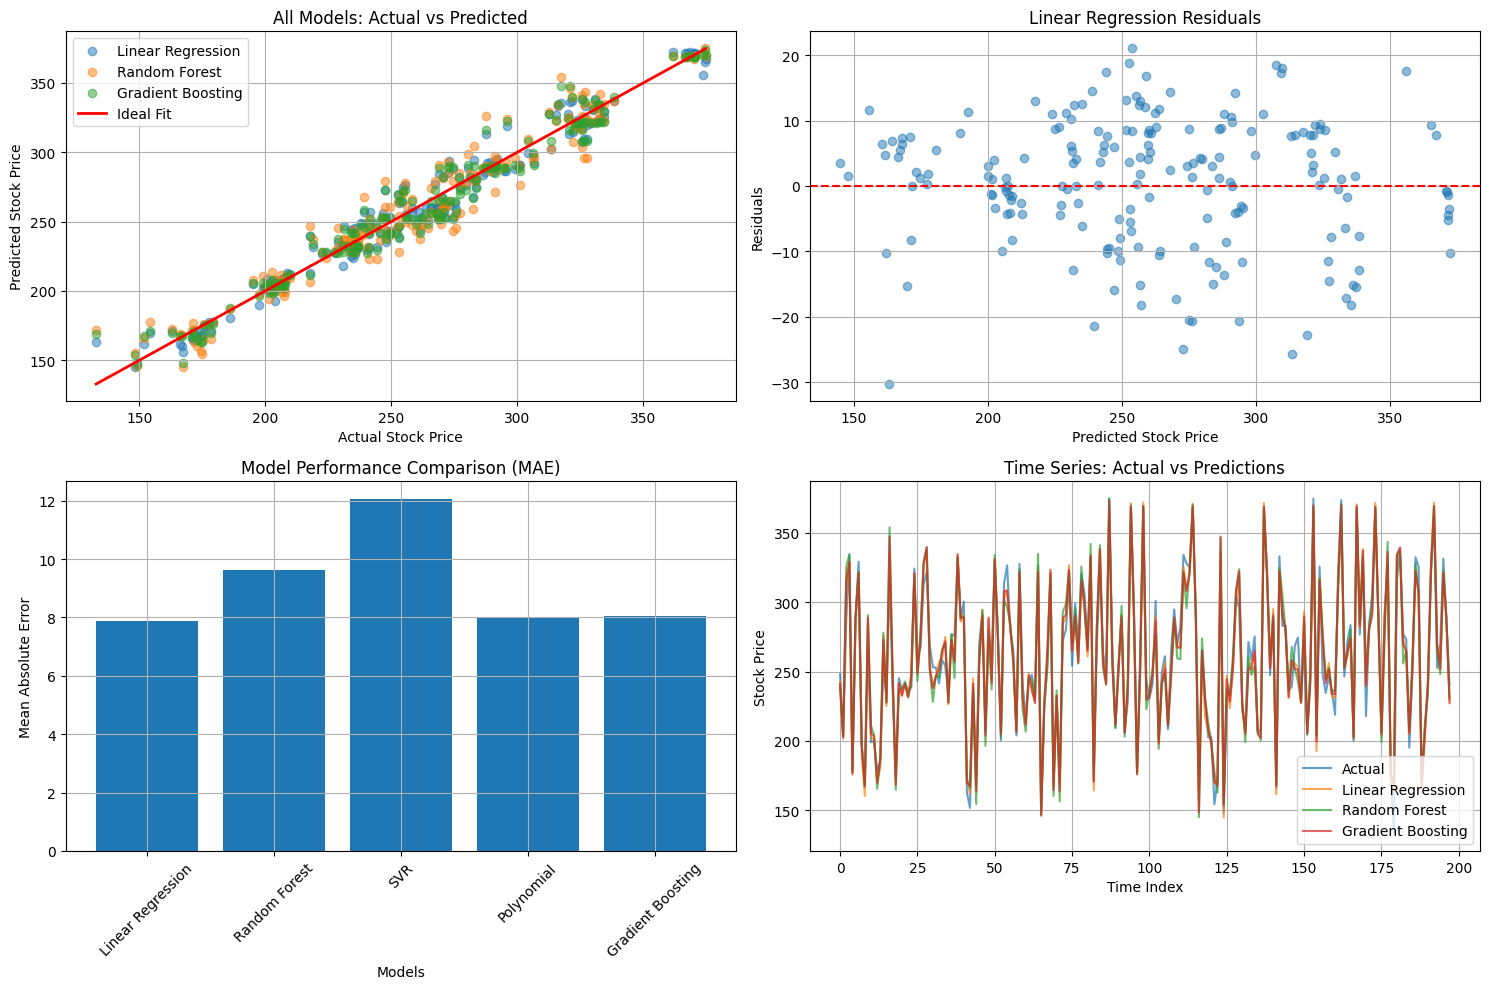


ENHANCED FEATURE ENGINEERING
Enhanced Random Forest (with technical indicators):
MAE: 12.7345
MSE: 372.3322
RMSE: 19.2959


/Users/utsavsharma/Desktop/money/venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [14]:
# 5. Model Comparison
models = {
    'Linear Regression': (y_pred, mae, mse),
    'Random Forest': (rf_pred, rf_mae, rf_mse),
    'SVR': (svr_pred, svr_mae, svr_mse),
    'Polynomial': (poly_pred, poly_mae, poly_mse),
    'Gradient Boosting': (gb_pred, gb_mae, gb_mse)
}

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
for name, (pred, mae_val, mse_val) in models.items():
    rmse_val = np.sqrt(mse_val)
    print(f"{name:20} | MAE: {mae_val:.4f} | MSE: {mse_val:.4f} | RMSE: {rmse_val:.4f}")

# 6. Feature Importance (for Random Forest)
feature_importance = rf_model.feature_importances_
print(f"\nFeature Importance (Random Forest):")
print(f"MA20: {feature_importance[0]:.4f}")

# 7. Cross-validation scores
print("\nCross-validation scores (5-fold):")
for name, model in [('Linear', model), ('Random Forest', rf_model), ('Gradient Boosting', gb_model)]:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    print(f"{name:15} | CV RMSE: {cv_rmse:.4f}")

# 8. Visualization of all models
plt.figure(figsize=(15, 10))

# Subplot 1: All predictions vs actual
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_pred, alpha=0.5, label='Random Forest')
plt.scatter(y_test, gb_pred, alpha=0.5, label='Gradient Boosting')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('All Models: Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.legend()
plt.grid(True)

# Subplot 2: Residuals plot
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Stock Price')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)

# Subplot 3: Model performance comparison
plt.subplot(2, 2, 3)
model_names = list(models.keys())
mae_values = [models[name][1] for name in model_names]
plt.bar(model_names, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Performance Comparison (MAE)')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 4: Time series of predictions
plt.subplot(2, 2, 4)
# Create a range of indices for x-axis since y_test is a numpy array
x_indices = range(len(y_test))
plt.plot(x_indices, y_test, label='Actual', alpha=0.7)
plt.plot(x_indices, y_pred, label='Linear Regression', alpha=0.7)
plt.plot(x_indices, rf_pred, label='Random Forest', alpha=0.7)
plt.plot(x_indices, gb_pred, label='Gradient Boosting', alpha=0.7)
plt.xlabel('Time Index')
plt.ylabel('Stock Price')
plt.title('Time Series: Actual vs Predictions')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 9. Additional technical indicators for enhanced prediction
print("\n" + "="*50)
print("ENHANCED FEATURE ENGINEERING")
print("="*50)

# Define technical indicator functions
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(prices, fast=12, slow=26, signal=9):
    ema_fast = prices.ewm(span=fast).mean()
    ema_slow = prices.ewm(span=slow).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal).mean()
    return macd_line

def calculate_bollinger_bands(prices, window=20, num_std=2):
    sma = prices.rolling(window=window).mean()
    std = prices.rolling(window=window).std()
    upper_band = sma + (std * num_std)
    lower_band = sma - (std * num_std)
    return upper_band, lower_band

# Calculate additional technical indicators
stock_data['RSI'] = calculate_rsi(stock_data['Close'], window=14)
stock_data['MACD'] = calculate_macd(stock_data['Close'])
stock_data['BB_upper'], stock_data['BB_lower'] = calculate_bollinger_bands(stock_data['Close'])

# Create enhanced feature set
enhanced_features = stock_data[['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower']].dropna()
enhanced_target = stock_data['Close'].iloc[len(stock_data) - len(enhanced_features):]

# Split enhanced data
X_enhanced_train, X_enhanced_test, y_enhanced_train, y_enhanced_test = train_test_split(
    enhanced_features, enhanced_target, test_size=0.2, random_state=42, shuffle=False
)

# Train enhanced Random Forest
enhanced_rf = RandomForestRegressor(n_estimators=100, random_state=42)
enhanced_rf.fit(X_enhanced_train, y_enhanced_train)
enhanced_pred = enhanced_rf.predict(X_enhanced_test)

# Calculate enhanced metrics
enhanced_mae = mean_absolute_error(y_enhanced_test, enhanced_pred)
enhanced_mse = mean_squared_error(y_enhanced_test, enhanced_pred)
enhanced_rmse = np.sqrt(enhanced_mse)

print(f"Enhanced Random Forest (with technical indicators):")
print(f"MAE: {enhanced_mae:.4f}")
print(f"MSE: {enhanced_mse:.4f}")
print(f"RMSE: {enhanced_rmse:.4f}")

# Feature importance for enhanced model
enhanced_importance = enhanced_rf.feature_importances_


In [15]:
print("=== PRICE PREDICTION EQUATIONS ===")
print()

# Linear Regression Equation
print("1. LINEAR REGRESSION EQUATION:")
print(f"   Price = {slope:.6f} × Time + {intercept:.6f}")
print(f"   Where Time is the number of days from start date")
print()

# Random Forest Prediction (Feature-based)
print("2. RANDOM FOREST PREDICTION EQUATION:")
print("   Price = RF_Predict(MA20, RSI, MACD, BB_upper, BB_lower)")
print("   Where:")
print("   - MA20 = 20-day Moving Average")
print("   - RSI = Relative Strength Index (14-period)")
print("   - MACD = Moving Average Convergence Divergence")
print("   - BB_upper = Bollinger Bands Upper Band")
print("   - BB_lower = Bollinger Bands Lower Band")
print()

# Gradient Boosting Prediction
print("3. GRADIENT BOOSTING PREDICTION EQUATION:")
print("   Price = GB_Predict(MA20, RSI, MACD, BB_upper, BB_lower)")
print("   (Same features as Random Forest, different algorithm)")
print()

# Technical Indicators Formulas
print("4. TECHNICAL INDICATORS FORMULAS:")
print("   MA20 = Σ(Close prices for last 20 days) / 20")
print("   RSI = 100 - (100 / (1 + RS))")
print("   Where RS = Average Gain / Average Loss (14 periods)")
print("   MACD = EMA(12) - EMA(26)")
print("   BB_upper = SMA(20) + (2 × Standard Deviation)")
print("   BB_lower = SMA(20) - (2 × Standard Deviation)")
print()

# Feature Importance Weights
print("5. FEATURE IMPORTANCE WEIGHTS (Random Forest):")
for i, feature in enumerate(['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower']):
    print(f"   {feature}: {enhanced_importance[i]:.4f}")
print()

# Prediction Accuracy Summary
print("6. MODEL ACCURACY METRICS:")
print(f"   Enhanced Random Forest RMSE: {enhanced_rmse:.4f}")
print(f"   Enhanced Random Forest MAE: {enhanced_mae:.4f}")
print()

print("=== END OF EQUATIONS ===")


=== PRICE PREDICTION EQUATIONS ===

1. LINEAR REGRESSION EQUATION:
   Price = 0.999706 × Time + 2.017573
   Where Time is the number of days from start date

2. RANDOM FOREST PREDICTION EQUATION:
   Price = RF_Predict(MA20, RSI, MACD, BB_upper, BB_lower)
   Where:
   - MA20 = 20-day Moving Average
   - RSI = Relative Strength Index (14-period)
   - MACD = Moving Average Convergence Divergence
   - BB_upper = Bollinger Bands Upper Band
   - BB_lower = Bollinger Bands Lower Band

3. GRADIENT BOOSTING PREDICTION EQUATION:
   Price = GB_Predict(MA20, RSI, MACD, BB_upper, BB_lower)
   (Same features as Random Forest, different algorithm)

4. TECHNICAL INDICATORS FORMULAS:
   MA20 = Σ(Close prices for last 20 days) / 20
   RSI = 100 - (100 / (1 + RS))
   Where RS = Average Gain / Average Loss (14 periods)
   MACD = EMA(12) - EMA(26)
   BB_upper = SMA(20) + (2 × Standard Deviation)
   BB_lower = SMA(20) - (2 × Standard Deviation)

5. FEATURE IMPORTANCE WEIGHTS (Random Forest):
   MA20: 0.2661

=== POLYNOMIAL RANDOM FOREST RESULTS ===
Polynomial RF RMSE: 57.1687
Polynomial RF MAE: 46.3959
Polynomial RF R² Score: -0.1239

=== POLYNOMIAL FEATURE IMPORTANCE ===
MA20: 0.0218
RSI: 0.0620
MACD: 0.0470
BB_upper: 0.0350
BB_lower: 0.0397
MA20^2: 0.0209
MA20 RSI: 0.0597
MA20 MACD: 0.0399
MA20 BB_upper: 0.0350
MA20 BB_lower: 0.0416
RSI^2: 0.0605
RSI MACD: 0.0684
RSI BB_upper: 0.0841
RSI BB_lower: 0.0867
MACD^2: 0.0935
MACD BB_upper: 0.0478
MACD BB_lower: 0.0577
BB_upper^2: 0.0360
BB_upper BB_lower: 0.0235
BB_lower^2: 0.0392

=== MODEL COMPARISON ===
Original RF RMSE: 19.2959
Polynomial RF RMSE: 57.1687
Improvement: -196.27%



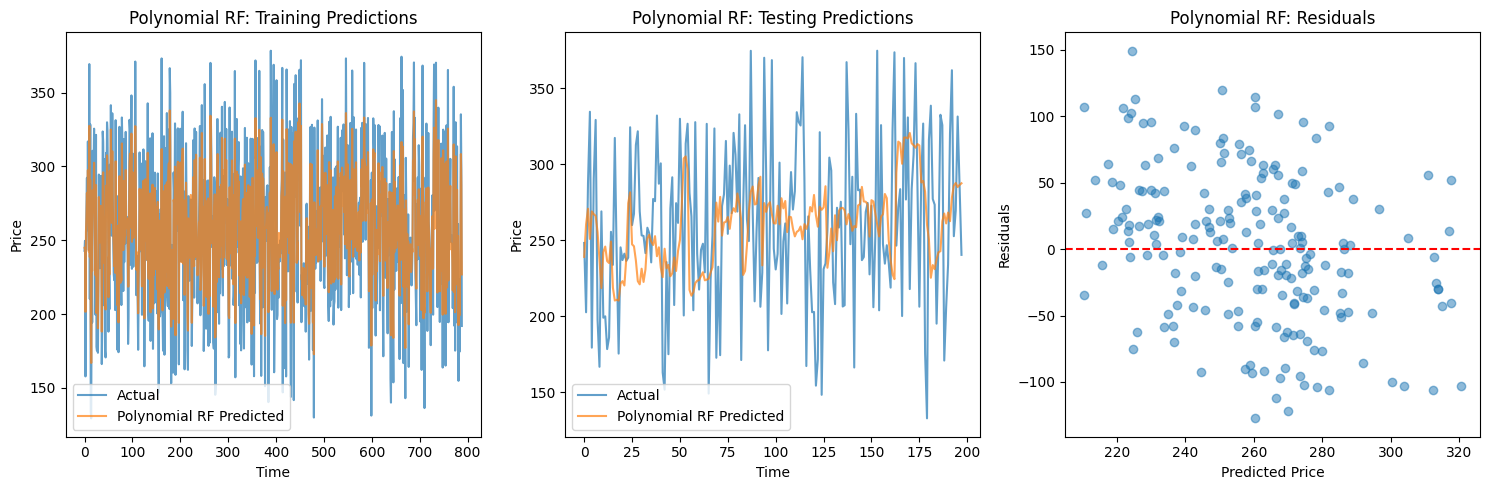

=== POLYNOMIAL RF EQUATION ===
Polynomial RF captures non-linear relationships through:
1. Polynomial feature transformations (degree=2)
2. Random Forest ensemble learning
3. Feature interactions and non-linear patterns
4. Enhanced predictive power for complex price movements


In [19]:
# Polynomial Random Forest for Price Prediction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Create polynomial features from existing features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_enhanced_train)

# Split polynomial features into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y_train.ravel(), test_size=0.2, random_state=42
)

# Create Polynomial Random Forest pipeline
poly_rf_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the polynomial random forest model
poly_rf_pipeline.fit(X_enhanced_train, y_train.ravel())

# Make predictions
poly_rf_train_pred = poly_rf_pipeline.predict(X_enhanced_train)
poly_rf_test_pred = poly_rf_pipeline.predict(X_enhanced_test)

# Calculate metrics
poly_rf_rmse = np.sqrt(mean_squared_error(y_test, poly_rf_test_pred))
poly_rf_mae = mean_absolute_error(y_test, poly_rf_test_pred)
poly_rf_r2 = r2_score(y_test, poly_rf_test_pred)

print("=== POLYNOMIAL RANDOM FOREST RESULTS ===")
print(f"Polynomial RF RMSE: {poly_rf_rmse:.4f}")
print(f"Polynomial RF MAE: {poly_rf_mae:.4f}")
print(f"Polynomial RF R² Score: {poly_rf_r2:.4f}")
print()

# Get feature names for polynomial features
poly_feature_names = poly_features.get_feature_names_out(['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower'])

# Get feature importance from the Random Forest part of the pipeline
poly_rf_importance = poly_rf_pipeline.named_steps['rf'].feature_importances_

print("=== POLYNOMIAL FEATURE IMPORTANCE ===")
for i, (name, importance) in enumerate(zip(poly_feature_names, poly_rf_importance)):
    if importance > 0.01:  # Only show features with importance > 1%
        print(f"{name}: {importance:.4f}")
print()

# Compare with original Random Forest
print("=== MODEL COMPARISON ===")
print(f"Original RF RMSE: {enhanced_rmse:.4f}")
print(f"Polynomial RF RMSE: {poly_rf_rmse:.4f}")
improvement = ((enhanced_rmse - poly_rf_rmse) / enhanced_rmse) * 100
print(f"Improvement: {improvement:.2f}%")
print()

# Plot polynomial RF predictions
plt.figure(figsize=(15, 5))

# Training predictions
plt.subplot(1, 3, 1)
plt.plot(y_train, label='Actual', alpha=0.7)
plt.plot(poly_rf_train_pred, label='Polynomial RF Predicted', alpha=0.7)
plt.title('Polynomial RF: Training Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Testing predictions
plt.subplot(1, 3, 2)
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(poly_rf_test_pred, label='Polynomial RF Predicted', alpha=0.7)
plt.title('Polynomial RF: Testing Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Residuals
plt.subplot(1, 3, 3)
residuals = y_test.flatten() - poly_rf_test_pred
plt.scatter(poly_rf_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Polynomial RF: Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

print("=== POLYNOMIAL RF EQUATION ===")
print("Polynomial RF captures non-linear relationships through:")
print("1. Polynomial feature transformations (degree=2)")
print("2. Random Forest ensemble learning")
print("3. Feature interactions and non-linear patterns")
print("4. Enhanced predictive power for complex price movements")
